In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.io import loadmat


In [62]:
%matplotlib inline

In [33]:
#open leaderboard data
leaderboard_data = loadmat('..\\leaderboard_data.mat')
raw_training_data = loadmat('..\\raw_training_data.mat')

In [34]:
#glove data for training - per subject
train_dg_s1 = raw_training_data['train_dg'][0][0]
train_dg_s2 = raw_training_data['train_dg'][1][0]
train_dg_s3 = raw_training_data['train_dg'][2][0]

In [35]:
train_dg_s1_downsample = train_dg_s1[::50][:-1]
train_dg_s2_downsample = train_dg_s2[::50][:-1]
train_dg_s3_downsample = train_dg_s3[::50][:-1]

In [36]:
# print(train_dg_s1_downsample.shape)
# print(feats_s1_train.shape)
# plt.scatter(feats_s1_train[:,[0:]], train_dg_s1_downsample)

In [37]:
file_s1 = open("all_feats_s1_norm_train_fx.npy", "rb")
feats_s1_train = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_norm_train_fx.npy", "rb")
feats_s2_train = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_norm_train_fx.npy", "rb")
feats_s3_train = np.load(file_s3)
file_s3.close()

In [38]:
file_s1 = open("all_feats_s1_norm_test_fx.npy", "rb")
feats_s1_test = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_norm_test_fx.npy", "rb")
feats_s2_test = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_norm_test_fx.npy", "rb")
feats_s3_test = np.load(file_s3)
file_s3.close()

In [39]:
# Problematic features, drop them for now. 
def clean_features(feats):
    bad_feat_inds = np.concatenate((np.arange(2,len(feats.transpose()),7),
                                   np.arange(3,len(feats.transpose()),7),
                                   np.arange(4,len(feats.transpose()),7),
                                  ))
    feats_cleaned = np.delete(feats, bad_feat_inds, axis=1)
    
    return feats_cleaned

feats_s1_train = clean_features(feats_s1_train)
feats_s2_train = clean_features(feats_s2_train)
feats_s3_train = clean_features(feats_s3_train)

feats_s1_test = clean_features(feats_s1_test)
feats_s2_test = clean_features(feats_s2_test)
feats_s3_test = clean_features(feats_s3_test)

In [40]:
train_inds = np.random.choice(np.arange(0,len(feats_s1_train)), 4500, replace=False)
selection_mask = np.zeros(len(feats_s1_train))
selection_mask[train_inds] = 1

In [41]:
feats_s1_train_split = feats_s1_train[selection_mask.astype(bool)]
feats_s1_valid_split = feats_s1_train[~selection_mask.astype(bool)]

print(feats_s1_train_split.shape)
print(feats_s1_valid_split.shape)

feats_s2_train_split = feats_s2_train[selection_mask.astype(bool)]
feats_s2_valid_split = feats_s2_train[~selection_mask.astype(bool)]

print(feats_s2_train_split.shape)
print(feats_s2_valid_split.shape)

feats_s3_train_split = feats_s3_train[selection_mask.astype(bool)]
feats_s3_valid_split = feats_s3_train[~selection_mask.astype(bool)]

print(feats_s3_train_split.shape)
print(feats_s3_valid_split.shape)

(4500, 244)
(1499, 244)
(4500, 184)
(1499, 184)
(4500, 256)
(1499, 256)


In [42]:
dg_s1_train_split = train_dg_s1_downsample[selection_mask.astype(bool)]
dg_s1_valid_split = train_dg_s1_downsample[~selection_mask.astype(bool)]

dg_s2_train_split = train_dg_s2_downsample[selection_mask.astype(bool)]
dg_s2_valid_split = train_dg_s2_downsample[~selection_mask.astype(bool)]


dg_s3_train_split = train_dg_s3_downsample[selection_mask.astype(bool)]
dg_s3_valid_split = train_dg_s3_downsample[~selection_mask.astype(bool)]


In [43]:
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor

In [44]:
reg = Lasso(alpha=1e-5, fit_intercept=True).fit(feats_s1_train_split, dg_s1_train_split)

In [45]:
pred = reg.predict(feats_s1_valid_split)

In [46]:
subj1_corr = []
for i in range(5):
    finger_pred = pred.transpose()[i]
    finger_truth = dg_s1_valid_split.transpose()[i]
    subj1_corr.append(pearsonr(finger_pred, finger_truth)[0])

print(subj1_corr)

[0.3509149977039565, 0.37155662321171057, 0.21996095893028553, 0.3264542563142046, 0.2611730570489261]


In [47]:
# SUBJECT 2
reg2 = Lasso(alpha=1e-5, fit_intercept=True).fit(feats_s2_train_split, dg_s2_train_split)

In [48]:
pred2 = reg2.predict(feats_s2_valid_split)

subj2_corr = []
for i in range(5):
    finger_pred = pred2.transpose()[i]
    finger_truth = dg_s2_valid_split.transpose()[i]
    subj2_corr.append(pearsonr(finger_pred, finger_truth)[0])

print(subj2_corr)

[0.35995980297369423, 0.2566970505540986, 0.22011979923269503, 0.31185757622417576, 0.22833432921224034]


In [49]:
reg3 = Lasso(alpha=1e-5, fit_intercept=True).fit(feats_s3_train_split, dg_s3_train_split)

In [50]:
pred3 = reg3.predict(feats_s3_valid_split)

subj3_corr = []
for i in range(5):
    finger_pred = pred3.transpose()[i]
    finger_truth = dg_s3_valid_split.transpose()[i]
    subj3_corr.append(pearsonr(finger_pred, finger_truth)[0])

print(subj3_corr)

[0.516372773718514, 0.4516490081561451, 0.44326576149658486, 0.5037412801102252, 0.45039299498649055]


# Upsampling

Predict on the full featureset, then upsample and spline the results.

In [51]:
from scipy.interpolate import CubicSpline

In [ ]:
def spline_preds(preds, time_length):
    # N samples
    preds_sample_orig = np.arange(len(preds))
    
    # T time points
    preds_sample_target = np.linspace(0,len(preds),time_length)
    print(preds_sample_target)
    preds = preds.transpose()

    preds_interp = []
    
    for finger_preds in preds:
        f = CubicSpline(preds_sample_orig, finger_preds, bc_type="natural")
        new_preds = f(preds_sample_target)
        preds_interp.append(new_preds)
    
    preds_interp = np.array(preds_interp).transpose()
    
    return preds_interp

def compute_corr(preds, truth):
    subj_corr = []
    for i in range(5):
        finger_pred = preds.transpose()[i]
        finger_truth = truth.transpose()[i]
        subj_corr.append(pearsonr(finger_pred, finger_truth)[0])
    
    return subj_corr

In [66]:
pred_s1_full = reg.predict(feats_s1_train)
pred_s2_full = reg2.predict(feats_s2_train)
pred_s3_full = reg3.predict(feats_s3_train)

preds_s1_full_spline = spline_preds(pred_s1_full, 300000)
preds_s2_full_spline = spline_preds(pred_s2_full, 300000)
preds_s3_full_spline = spline_preds(pred_s3_full, 300000)


[0.00000000e+00 1.99967333e-02 3.99934666e-02 ... 5.99896001e+03
 5.99898000e+03 5.99900000e+03]
[0.00000000e+00 1.99967333e-02 3.99934666e-02 ... 5.99896001e+03
 5.99898000e+03 5.99900000e+03]
[0.00000000e+00 1.99967333e-02 3.99934666e-02 ... 5.99896001e+03
 5.99898000e+03 5.99900000e+03]


[0.4204619705817093, 0.47267838078984953, 0.33771275096124787, 0.4131940761070779, 0.3697359374279341]
[0.4315797087274355, 0.32952676633879346, 0.3393566417290464, 0.3972462954238371, 0.31387047682073693]
[0.5920412205758955, 0.5274599959487074, 0.503287913080673, 0.5736521536164527, 0.5200451483492952]


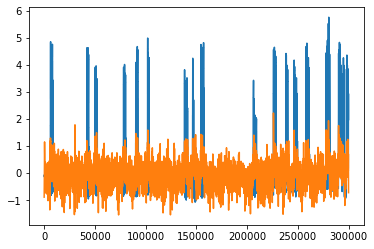

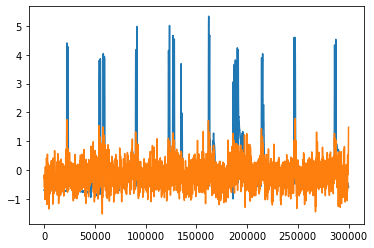

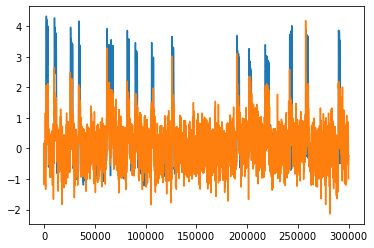

In [69]:
# Some examples
plt.figure()
plt.plot(train_dg_s1.transpose()[0])
plt.plot(preds_s1_full_spline.transpose()[0])
print(compute_corr(preds_s1_full_spline, train_dg_s1))

plt.figure()
plt.plot(train_dg_s2.transpose()[0])
plt.plot(preds_s2_full_spline.transpose()[0])
print(compute_corr(preds_s2_full_spline, train_dg_s2))

plt.figure()
plt.plot(train_dg_s3.transpose()[0])
plt.plot(preds_s3_full_spline.transpose()[0])
print(compute_corr(preds_s3_full_spline, train_dg_s3))

In [70]:
def convolve_gaussian(preds):
    preds_t = preds.transpose()
    preds_t_convolve = []
    
    fs = 1000
    gaussian_filter = np.exp(-1*(np.arange(int(-0.500*1000),int(0.500*1000)))**2/(0.35*1000)**2)
    gaussian_filter_scaled = 1/np.sum(gaussian_filter) * gaussian_filter
    
    for row in preds_t:
        preds_t_convolve.append(np.convolve(gaussian_filter_scaled, row, "same"))
    
    return np.array(preds_t_convolve).transpose()

[0.579340916305577, 0.6067801979680538, 0.46977424086422426, 0.5919611799612778, 0.5488345098335545]
[0.6079562442548367, 0.4243423446709148, 0.4446391914223393, 0.49501369617912677, 0.46383599601343184]
[0.7680562604932333, 0.6841789614235246, 0.6852005096606093, 0.7349746892420349, 0.6853339562455395]


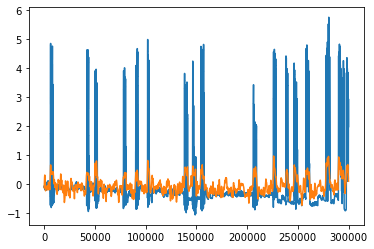

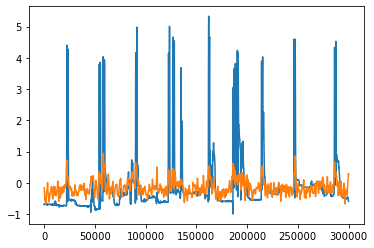

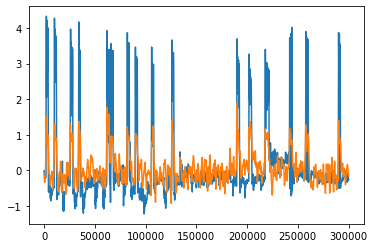

In [73]:
preds_s1_gaus = convolve_gaussian(preds_s1_full_spline)
preds_s2_gaus = convolve_gaussian(preds_s2_full_spline)
preds_s3_gaus = convolve_gaussian(preds_s3_full_spline)

# Some examples
plt.figure()
plt.plot(train_dg_s1.transpose()[0])
plt.plot(preds_s1_gaus.transpose()[0])
print(compute_corr(preds_s1_gaus, train_dg_s1))

plt.figure()
plt.plot(train_dg_s2.transpose()[0])
plt.plot(preds_s2_gaus.transpose()[0])
print(compute_corr(preds_s2_gaus, train_dg_s2))

plt.figure()
plt.plot(train_dg_s3.transpose()[0])
plt.plot(preds_s3_gaus.transpose()[0])
print(compute_corr(preds_s3_gaus, train_dg_s3))

# Predict Leaderboard

In [74]:
pred_s1_test = reg.predict(feats_s1_test)
pred_s1_test_spline = spline_preds(pred_s1_test, 147500)
pred_s1_test_gaus = convolve_gaussian(pred_s1_test_spline)

pred_s2_test = reg2.predict(feats_s2_test)
pred_s2_test_spline = spline_preds(pred_s2_test, 147500)
pred_s2_test_gaus = convolve_gaussian(pred_s2_test_spline)

pred_s3_test = reg3.predict(feats_s3_test)
pred_s3_test_spline = spline_preds(pred_s3_test, 147500)
pred_s3_test_gaus = convolve_gaussian(pred_s3_test_spline)

[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]
[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]
[0.00000000e+00 1.99933559e-02 3.99867118e-02 ... 2.94896001e+03
 2.94898001e+03 2.94900000e+03]


In [55]:
from scipy.io import savemat

In [56]:
predictions_array_spline = np.zeros((3,1), dtype=object)
predictions_array_spline[0,0] = pred_s1_test_spline
predictions_array_spline[1,0] = pred_s2_test_spline
predictions_array_spline[2,0] = pred_s3_test_spline

savemat('predictions_simple_norm.mat', {'predicted_dg':predictions_array_spline})

In [75]:
predictions_array_spline = np.zeros((3,1), dtype=object)
predictions_array_spline[0,0] = pred_s1_test_gaus
predictions_array_spline[1,0] = pred_s2_test_gaus
predictions_array_spline[2,0] = pred_s3_test_gaus

savemat('predictions_simple_norm_postprocessed.mat', {'predicted_dg':predictions_array_spline})